In [1]:
from rayoptics.environment import *
from rayoptics.util.misc_math import normalize

In [2]:
'''Создание новой модели'''
opm = OpticalModel()
sm = opm['seq_model']
osp = opm['optical_spec']
pm = opm['parax_model']
em = opm['ele_model']
pt = opm['part_tree']

In [3]:
''' Задаем параметры воздействия на нашу оптическую схему,
эти параметры подбирать не нужно, они остаются неизменными'''

osp['pupil'] = PupilSpec(osp, value=2.5)
osp['fov'] = FieldSpec(osp, flds=[0., 5., 10., 15., 20.])
osp['wvls'] = WvlSpec([[470., 1], [650., 1]], ref_wl=1)

In [4]:
"""Эти два параметра тоже трогать не нужно"""
opm.radius_mode = False
sm.gaps[0].thi = 1e10

'''Любая поверхность задаётся 4 параметрами: радиус кривизны, толщина поверхности, ее коэф. преломления
и коэф. abbe. Последние два задаются по определенному соотношению, о нем будет ниже'''
sm.add_surface([0.27542996, 1.00281701, 1.54, 75.])

"""С помощью строки ниже мы задаем форму поверхности линзы, c - это радиус кривизны,остальные коэффициенты
вообще можно не указывать, они по умалчанию равны нулю, но они очень сильно могут менять конечный результат,
поэтому их точность довольно высокая"""
sm.ifcs[sm.cur_surface].profile = EvenPolynomial(c=0.27542996)#, cc=0.0,
#                                                  coefs=[0.0, 0.009109298409282469, -0.03374649200850791,
#                                                         0.01797256809388843, -0.0050513483804677005, 0.0,
#                                                         0.0,
#                                                         0.0])

"""Эти параметры пока хз за что отвечают, если их убрать, то ничего критичного не происходит,
перестают только вылазить предупреждения при обновлении модели"""
#sm.ifcs[sm.cur_surface].interact_mode = 'transmit'
#sm.set_stop()

"""Здесь строится вторая поверхность линзы, так как за ней будет идти воздух, указываются только первые
два параметра (радиус кривизны и толщина). Кривизна указывается именно для второй поверхности 
линзы(которая правее), а толщина указывается для воздуха"""
sm.add_surface([0.1374222, 0.53156155])
"""Эти параметры аналогично указываются для правой поверхности линзы"""
sm.ifcs[sm.cur_surface].profile = EvenPolynomial(c=0.1374222)#, cc=0.0,
#                                                  coefs=[0.0, -0.002874728268075267, -0.03373322938525211,
#                                                         0.004205227876537139, -0.0001705765222318475,
#                                                         0.0, 0.0, 0.0])

"""Здесь вторая линза"""
sm.add_surface([-0.04240646, 1.10184289, 1.67, 39.])
sm.ifcs[sm.cur_surface].profile = EvenPolynomial(c=-0.04240646)#, cc=0.0,
#                                                  coefs=[0.0, -0.0231369463217776, 0.011956554928461116,
#                                                         -0.017782670650182023, 0.004077846642272649, 0.0,
#                                                         0.0, 0.0])
"""Конец воторй линзы"""
sm.add_surface([-0.24704522, 4.20080894])
"""Здесь они решили использовать функцию Spherical, по графику можно заметить, что она строит 
самую простую сферическую поверхность для линзы с заданным радиусом"""
sm.ifcs[sm.cur_surface].profile = Spherical(c=-0.24704522)

"""Это менять не нужно"""
sm.ifcs[-1].profile = EvenPolynomial(c=0.0, cc=0.0, coefs=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [5]:
"""Насчет толщины могу сказать, что сумма все вторых коэффициентов, которые мы задаем
при создании поверхности должна быть не больше 7. В данном примере: """
thickness = [1.00281701, 0.53156155, 1.10184289, 4.20080894]
sum(thickness)

6.83703039

In [6]:
"""И еще одно ограничение в том, что линза не может быть тоньше 0.1"""

'И еще одно ограничение в том, что линза не может быть тоньше 0.1'

In [7]:
opm.update_model()

In [8]:
"""Здесь я написал зависимости, по которым должны меняться коэф. преломления
и коэф. abbe. k - это концентрация первого вещества в нашей смеси двух материалов"""

def calc_n(k):
    return 1.54 * k + 1.67 * (1-k)

def calc_abbe(k):
    return 75 * k + 39 * (1-k)

list_n = []
list_abbe = []

"""Здвесь просто пример для наглядности, как меняются коэфы с интерввалом 10% от 0 до 100%"""
for i in range(0,11):
    k = i/10
    list_n.append(calc_n(k))
    list_abbe.append((calc_abbe(k)))

list_n, list_abbe

([1.67,
  1.657,
  1.6440000000000001,
  1.6309999999999998,
  1.618,
  1.605,
  1.592,
  1.5789999999999997,
  1.566,
  1.5530000000000002,
  1.54],
 [39.0, 42.6, 46.2, 49.8, 53.4, 57.0, 60.6, 64.2, 67.8, 71.4, 75.0])

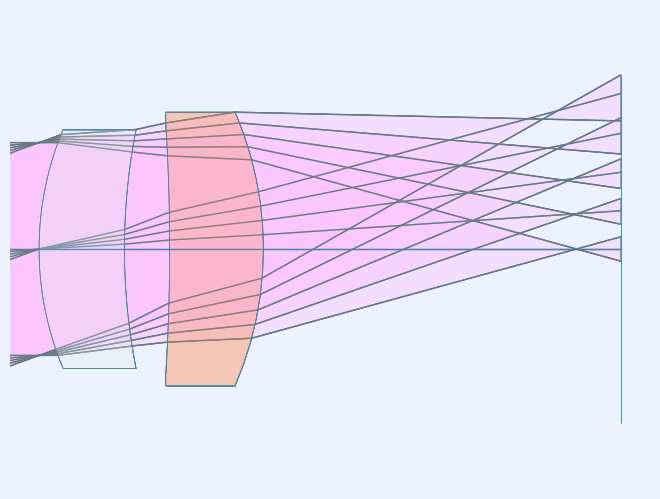

In [9]:
layout_plt0 = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                        do_draw_rays=True, do_paraxial_layout=False,
                        is_dark=False).plot()

In [10]:
opm['analysis_results']['parax_data'].fod.fno <= 2.1

True

In [11]:
opm['analysis_results']['parax_data'].fod.fno

2.080428629036742